In [1]:
import pandas as pd

In [2]:
movies_ratings = pd.read_csv("Movies_ratings.csv")
movies_ratings.head()

,users,movies,ratings
0,Lisa Rose,Lady in the Water,2.5
1,Lisa Rose,Snakes on a Plane,3.5
2,Lisa Rose,Just My Luck,3.0
3,Lisa Rose,Superman Returns,3.5
4,Lisa Rose,"You, Me and Dupree",2.5


In [3]:
movies_ratings.shape

(35, 3)

In [4]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   users    35 non-null     object 
 1   movies   35 non-null     object 
 2   ratings  35 non-null     float64
dtypes: float64(1), object(2)
memory usage: 972.0+ bytes


In [6]:
movies_ratings.isna().sum()

users      0
movies     0
ratings    0
dtype: int64

In [12]:
movies_ratings['users'].unique()

array(['Lisa Rose', 'Gene Seymour', 'Michael Phillips', 'Claudia Puig',
       'Mick LaSalle', 'Jack Matthews', 'Toby'], dtype=object)

In [13]:
movies_ratings['movies'].unique()

array(['Lady in the Water', 'Snakes on a Plane', 'Just My Luck',
       'Superman Returns', 'You, Me and Dupree', 'The Night Listener'],
      dtype=object)

In [11]:
utility_matrix = movies_ratings.pivot_table(index='users',columns='movies',values='ratings')
utility_matrix

movies,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
users,,,,,,
Claudia Puig,3.0,NaN,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Michael Phillips,NaN,2.5,3.0,3.5,4.0,NaN
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,NaN,NaN,4.5,4.0,NaN,1.0


Text(0.5, 1.0, 'Similar Movies')

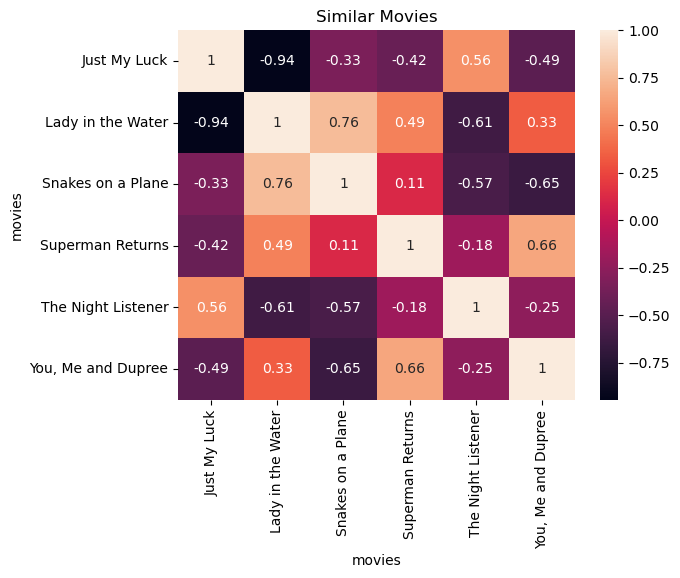

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(utility_matrix.corr(), annot=True)
plt.title("Similar Movies")

Text(0.5, 1.0, 'Similar Movies')

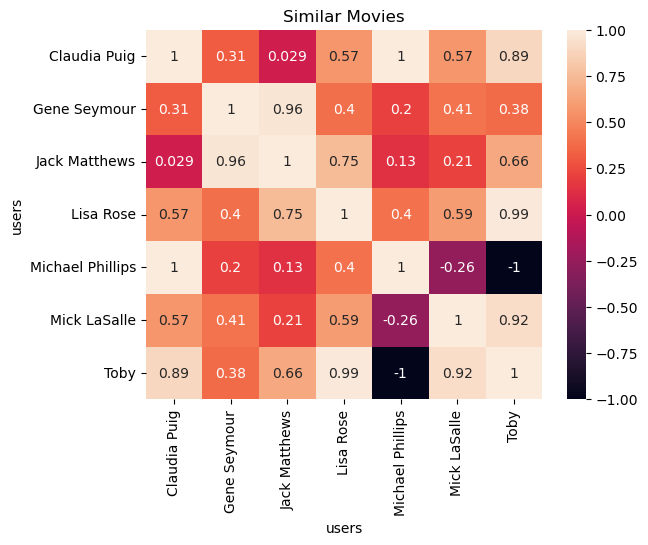

In [16]:
sns.heatmap(utility_matrix.T.corr(), annot=True)
plt.title("Similar Movies")

In [36]:
def recommend(utility_matrix, target, n=5, user_based= True):
    X = utility_matrix
    if user_based:
        X = X.T
    if target not in X.columns:
        return None
    matches = X.corr()[target].sort_values(ascending=False)
    matches = matches.drop(target).head(n)
    return list(zip(matches.index, matches.values))

In [18]:
users = utility_matrix.index
users

Index(['Claudia Puig', 'Gene Seymour', 'Jack Matthews', 'Lisa Rose',
       'Michael Phillips', 'Mick LaSalle', 'Toby'],
      dtype='object', name='users')

In [28]:
toby=users[6]
toby

'Toby'

In [37]:
recommend(utility_matrix, 'Toby', user_based=True)

[('Lisa Rose', 0.9912407071619305),
 ('Mick LaSalle', 0.924473451641905),
 ('Claudia Puig', 0.8934051474415642),
 ('Jack Matthews', 0.6628489803598702),
 ('Gene Seymour', 0.3812464258315117)]

In [38]:
items = utility_matrix.columns

In [39]:
superman_return = items[3]
superman_return

'Superman Returns'

In [41]:
recommend(utility_matrix, superman_return, user_based=False)

[('You, Me and Dupree', 0.6579516949597688),
 ('Lady in the Water', 0.48795003647426655),
 ('Snakes on a Plane', 0.11180339887498938),
 ('The Night Listener', -0.1798471947990542),
 ('Just My Luck', -0.4228900316110311)]

In [42]:
print(recommend(utility_matrix, 'ascascascasec', user_based=False) )

None
